# Resolución del problema de los chips con Regresión Logistica

Utilizando las siguientes funciones/paquetes resolver los siguientes problemas de clasificación.

**genfromtxt** de **numpy** para leer el dataset:
- ./datasets/chip_tests.txt

**train_test_split** de **sklearn** para dividir entre test set y train set. Recomendamos un 40% de datos para test set

**GaussianNB** de **sklearn** como modelo de ML.

Y la función **plot_boundaries(X_train, X_test, y_train, y_test, score, predict_proba, ax=ax, h=h)** incluida en problema_2.py para graficar los resultados. X_train es un np.array con los features de entrada, y_train es la etiqueta. Lo mismo con X_test e y_test, Score es el 'accuracy' del modelo, predict_proba es la función que dada una entrada de la probabilidad de clasificar correcto y h es el paso para la grafica del 'boundary' 

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
import pandas as pd

def plot_boundaries(X_train, y_train, score, probability_func, degree = None, n_colors = 100, mesh_res = 1000, ax = None):
    X = X_train #np.vstack((X_test, X_train))
    margin_x = (X[:, 0].max() - X[:, 0].min())*0.05
    margin_y = (X[:, 1].max() - X[:, 1].min())*0.05
    x_min, x_max = X[:, 0].min() - margin_x, X[:, 0].max() + margin_x
    y_min, y_max = X[:, 1].min() - margin_y, X[:, 1].max() + margin_y
    hx = (x_max-x_min)/mesh_res
    hy = (y_max-y_min)/mesh_res
    x_domain = np.arange(x_min, x_max, hx)
    y_domain = np.arange(y_min, y_max, hy)
    xx, yy = np.meshgrid(x_domain, y_domain)

    if ax is None:
        ax = plt.subplot(1, 1, 1)
    
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    if degree is not None:
        polynomial_set = get_polynimial_set(np.c_[xx.ravel(), yy.ravel()], degree = degree)
        Z = probability_func(polynomial_set)[:, 1]
    else:
        Z_aux = probability_func(np.c_[xx.ravel(), yy.ravel()])
        Z = Z_aux[:, 1]

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    
    cf = ax.contourf(xx, yy, Z, n_colors, vmin=0., vmax=1., cmap=cm, alpha=.8)
    plt.colorbar(cf, ax=ax)
    #plt.colorbar(Z,ax=ax)

    # Plot also the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
               edgecolors='k', s=100, marker='o')
    
    boundary_line = np.where(np.abs(Z-0.5)<0.001)
    
    ax.scatter(x_domain[boundary_line[1]], y_domain[boundary_line[0]], color='k', alpha=0.5, s=1)
    
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    #ax.set_xticks(())
    #ax.set_yticks(())
    ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
            size=40, horizontalalignment='right')
         
import math
def nCr(n,r):
    f = math.factorial
    return int(f(n) / f(r) / f(n-r))

''' 
Utilizando las siguientes funciones/paquetes resolver los siguientes problemas de clasificación en **problema_2.py**:

**genfromtxt** de **numpy** para leer los dos datasets:
- ./datasets/student_admission.txt
- ./datasets/chip_tests.txt

**train_test_split** de **sklearn** para dividir entre test set y train set. Recomendamos un 40% de datos para test set

**GaussianNB** de **sklearn** como modelo de ML.

Y la función **plot_boundaries(X_train, X_test, y_train, y_test, score, predict_proba, ax=ax, h=h)** incluida en problema_2.py para graficar los resultados. X_train es un np.array con los features de entrada, y_train es la etiqueta. Lo mismo con X_test e y_test, Score es el 'accuracy' del modelo, predict_proba es la función que dada una entrada de la probabilidad de clasificar correcto y h es el paso para la grafica del 'boundary' 
'''

def get_polynimial_set(X, degree):
    # Recibe el dataset X de numero_de_muestras x features  y devuelve una matriz con todas las combinaciones 
    # De los productos del grado indicado en degree
    k = 2
    n = degree + k
    pos = 0
    X_mat = np.zeros((X.shape[0],nCr(n,k)))
    for i in range(degree + 1):
        for j in range(i+1):
            X_mat[:,pos] = (X[:,0]**(i-j))*X[:,1]**j
            pos = pos + 1
    return X_mat

In [23]:
#Funcion encargada de llevar a cabo la resolución de TODO
def train_and_plot(X, y, h):
    # X: features del dataset.
    # y: labels del dataset.
    # h: Degree
    # Se encarga de entrenar el modelo y graficar.
    
    #Split de datos en training y test
    X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.4, random_state=2)

    results = pd.DataFrame(columns=['Degrees','Train_Score','Test_Score'])
    
    for N in range(1,h):        
        #Muestro el grado
        print('Degree:{}'.format(N))
        
        #Genero mas features
        X_new_train = get_polynimial_set(X_train, N)
        X_new_test = get_polynimial_set(X_test, N)

        #Defino el modelo de Regresión Logistica
        clf = linear_model.LogisticRegression( C=1000000 )
        
        #Entreno al modelo.
        y_pred = clf.fit(X_new_train,y_train)                
        
        #Calculo los scores.
        Train_Score = y_pred.score(X_new_train, y_train)
        Test_Score = y_pred.score(X_new_test, y_test)        
        
        results = results.append({'Degrees':N, 'Train_Score':Train_Score, 'Test_Score':Test_Score}, ignore_index=True)

        #prde scores
        print('Train Score:{}'.format(Train_Score))
        print('Test Score:{}'.format(Test_Score)) 
        
        #Grafico
        plot_boundaries(X_train, y_train, score=Train_Score, probability_func=clf.predict_proba, degree=N)
        plt.show()
                
        print('-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-')

        
    #Muestro los resultados
    print(results)
    print('-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-')
    #Muestro el grafico comparando los grados vs Score.    
    %matplotlib inline
    plt.plot('Degrees', 'Train_Score', data=results, color='Red', label='Training Score')
    plt.plot('Degrees', 'Test_Score', data=results, color='Blue', label='Test Score')
    plt.title('Logistic Regression - Score VS Degree')
    plt.legend(loc="best")
    plt.show()
        
    return

# Resolución 

Degree:1
Train Score:0.5714285714285714
Test Score:0.4166666666666667


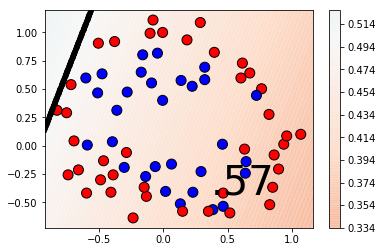

-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-
Degree:2
Train Score:0.8714285714285714
Test Score:0.75


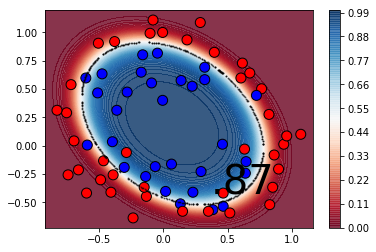

-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-
Degree:3
Train Score:0.8857142857142857
Test Score:0.7291666666666666


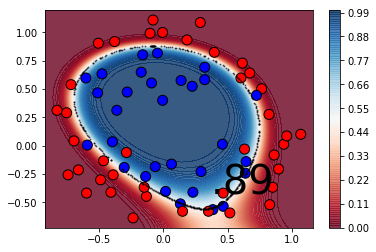

-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-
Degree:4
Train Score:0.9428571428571428
Test Score:0.75


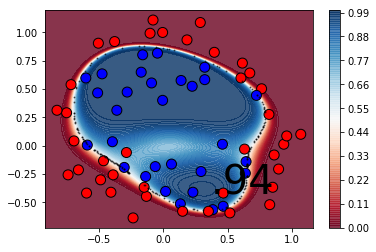

-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-
Degree:5
Train Score:0.9285714285714286
Test Score:0.6458333333333334


/home/fede/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/base.py:340: RuntimeWarning: overflow encountered in exp
  np.exp(prob, prob)


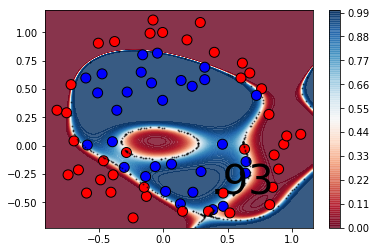

-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-
Degree:6
Train Score:0.9714285714285714
Test Score:0.6666666666666666


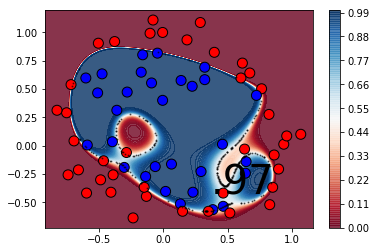

-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-
Degree:7
Train Score:0.9857142857142858
Test Score:0.6875


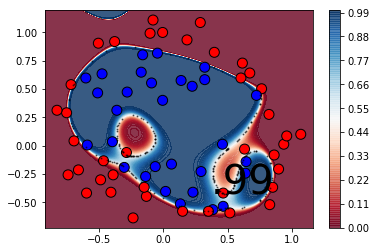

-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-
Degree:8
Train Score:1.0
Test Score:0.7291666666666666


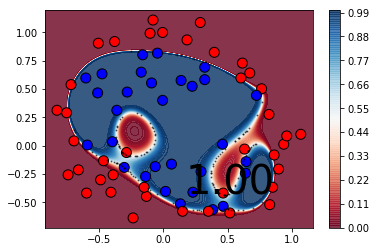

-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-
Degree:9
Train Score:1.0
Test Score:0.7291666666666666


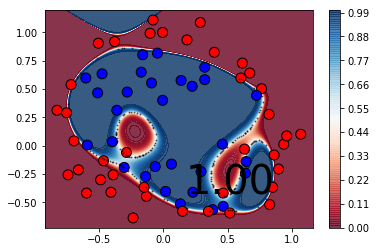

-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-
Degree:10
Train Score:1.0
Test Score:0.7083333333333334


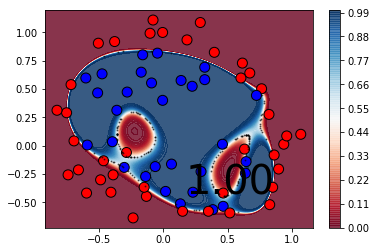

-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-
Degree:11
Train Score:0.9857142857142858
Test Score:0.7291666666666666


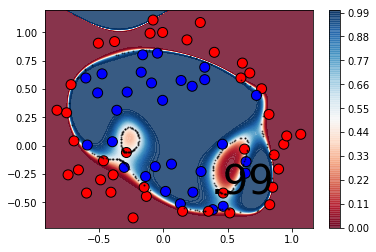

-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-
    Degrees  Train_Score  Test_Score
0       1.0     0.571429    0.416667
1       2.0     0.871429    0.750000
2       3.0     0.885714    0.729167
3       4.0     0.942857    0.750000
4       5.0     0.928571    0.645833
5       6.0     0.971429    0.666667
6       7.0     0.985714    0.687500
7       8.0     1.000000    0.729167
8       9.0     1.000000    0.729167
9      10.0     1.000000    0.708333
10     11.0     0.985714    0.729167
-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-


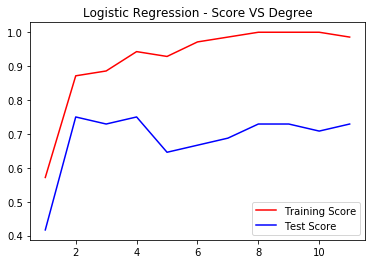

In [24]:
#Chips
dataset_chips = np.genfromtxt("./datasets/chip_tests.txt", delimiter = ",")
features = dataset_chips[:,(0,1)]
labels = dataset_chips[:,2]
#Degree
h = 12

#Aplico la función para resolver el problema.
train_and_plot(features,labels,h)